# Multiple Linear Regression
## Bike-sharing System Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Reading and Understanding the Data

In [241]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
#Reading the data set

bikerental = pd.read_csv("day.csv")
bikerental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [243]:
#Checking for any missing values
bikerental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [244]:
#Describing the Dataset

bikerental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [245]:
# Lets convert the date column to the date format and we can also add in a column for day of the week apart from the month column to see if we can get additional insights

bikerental['dteday'] = pd.to_datetime(bikerental['dteday'], format='%d-%m-%Y')
bikerental['dayofmonth'] = bikerental['dteday'].dt.day

#dropping dteday and instant
bikerental = bikerental.drop(['dteday','instant'], axis=1)

bikerental.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dayofmonth
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


## Visualising the Data

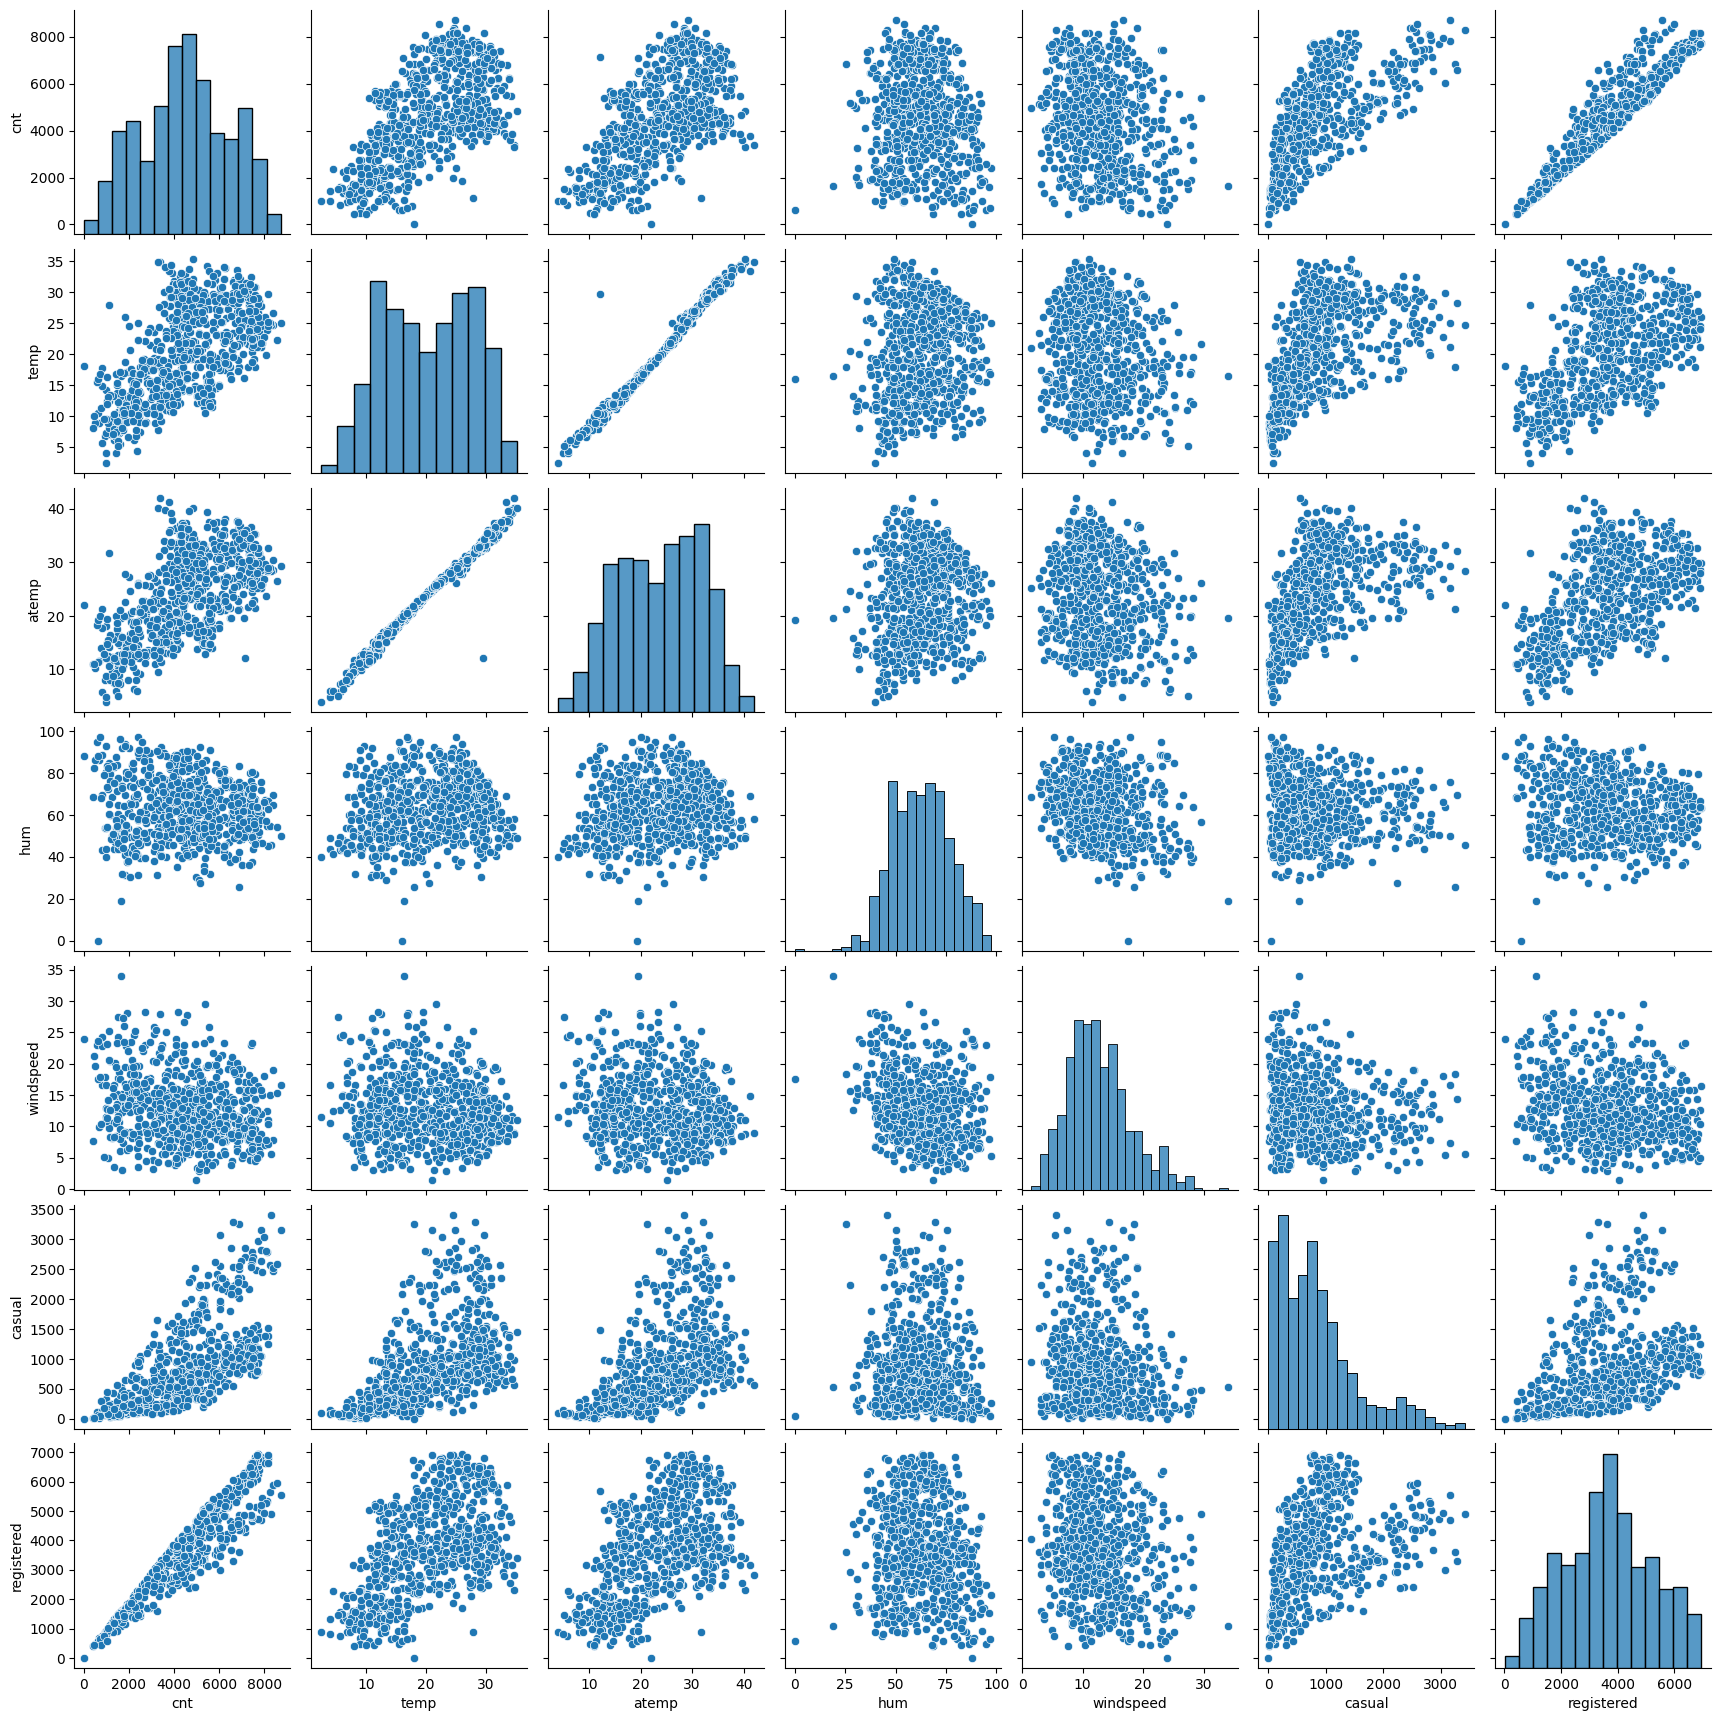

In [246]:
#Choosing the numeric values
bikerent_num = bikerental[['cnt','temp','atemp','hum','windspeed','casual','registered']]
sns.pairplot(bikerent_num)
plt.show()

From the above the sales counts appears to a have a strong co-relation to the temperature. We also see that data is less clustered around high windspeeds and low humidity. 
Between the casual and registered counts there's a strong relationship for the registered user sales vs casual. 
Finally between Temperature and real feel temperature (atemp) it makes sense to drop atemp to avoid multicollinearity. Also as we already have the data for humidity and atemp is related to both we can drop atemp.

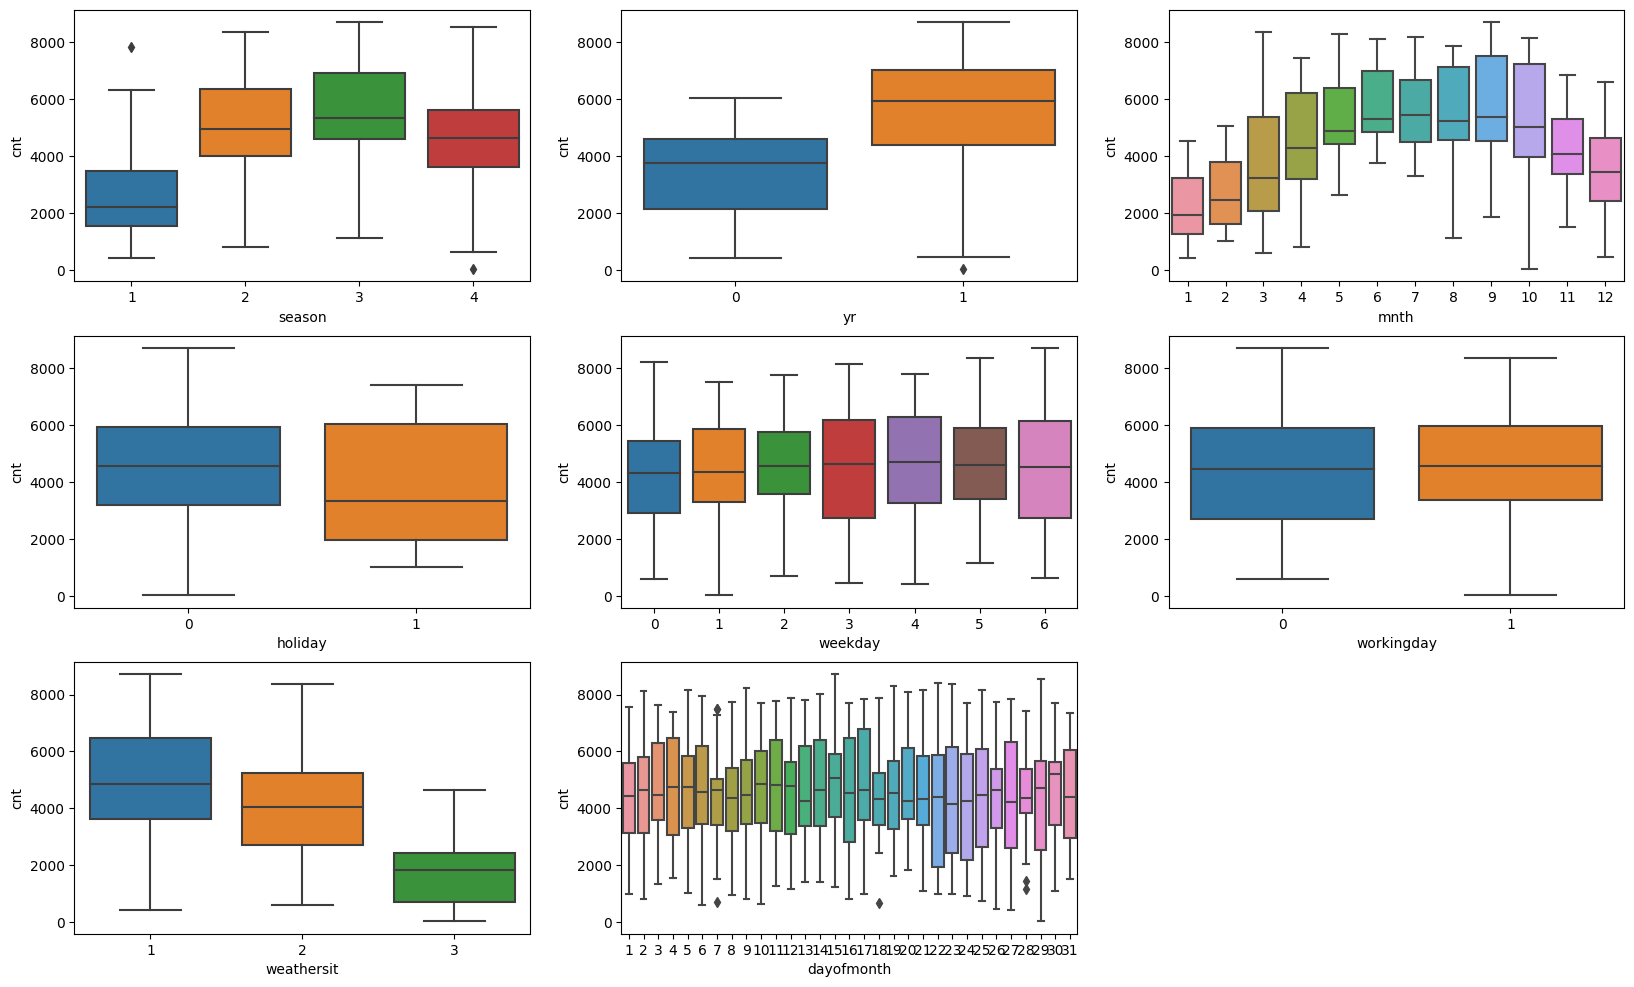

In [247]:
#Choosing the categorical values
bikerent_num = bikerental[['cnt','season','yr','mnth','holiday','weekday','workingday','dayofmonth']]
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikerental)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikerental)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikerental)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikerental)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikerental)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikerental)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikerental)
plt.subplot(3,3,8)
sns.boxplot(x = 'dayofmonth', y = 'cnt', data = bikerental)
plt.show()

From the above there are some patterns visible with better sales during clear days, mid year, wednesdays/Saturdays, holidays and 2019.

Also we can drop the column season and dayofmonth


In [248]:
bikerental = bikerental.drop(['dayofmonth','season', 'atemp','casual','registered'], axis=1)

## Splitting the Data into Training and Testing Sets


In [249]:
from sklearn.model_selection import train_test_split

bikerental_train, bikerental_test = train_test_split(bikerental, train_size=0.8, random_state=100)



### Rescaling the Features using Min-Max

In [250]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Numeric variables to rescale. We also temporarily exclude the casual vs registered users as they have a direct correlation to the total count and can skew the other results
num_vars = ['cnt','temp','hum','windspeed','mnth','weekday','weathersit']

bikerental_train[num_vars] = scaler.fit_transform(bikerental_train[num_vars])
bikerental_train.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
367,1,0.000000,0,0.333333,1,0.0,0.113228,0.454701,0.695175,0.254717
648,1,0.818182,0,0.666667,1,0.0,0.468352,0.477458,0.299450,0.868385
44,0,0.090909,0,0.166667,1,0.0,0.443431,0.387290,0.807474,0.217556
705,1,1.000000,0,0.833333,1,0.5,0.326094,0.787463,0.189819,0.573631
379,1,0.000000,0,0.000000,0,0.0,0.133996,0.431945,0.449210,0.263346


In [251]:
#Dividing into X and y

X_train = bikerental_train
y_train = bikerental_train.pop('cnt')

## Building model

In [252]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [253]:
# Running RFE with target selection variable of 7
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=7)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [254]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 2),
 ('workingday', False, 3),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [255]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'mnth', 'holiday', 'weathersit', 'temp', 'hum', 'windspeed'], dtype='object')

In [256]:
X_train.columns[~rfe.support_] # Dropping columns weekday and workingday in this case

Index(['weekday', 'workingday'], dtype='object')

In [257]:
# Creating X train with the rfe support columns : 'yr', 'mnth', 'holiday', 'weathersit', 'temp', 'hum', 'windspeed'
X_train_rfe = X_train[col]

In [258]:
import statsmodels.api as sm  

# Adding a constant variable due to the limitation with the stats model
X_train_rfe = sm.add_constant(X_train_rfe)

In [259]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [260]:
#Checking the summary for the fit and we see that its a good fit with the model explaining close to 78% of the variation in the data

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     289.4
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          5.65e-184
Time:                        23:25:14   Log-Likelihood:                 482.42
No. Observations:                 584   AIC:                            -948.8
Df Residuals:                     576   BIC:                            -913.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2096      0.030      6.946      0.0

In [261]:
# Calculate the VIFs for the new model and we notice that humidity has a high VIF and could be problematic
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,13.71
4,temp,7.37
1,mnth,3.98
6,windspeed,3.47
3,weathersit,2.15
0,yr,2.00
2,holiday,1.04


## Residual Analysis

In [262]:
#X_train.shape

X_train_lm = X_train.drop(['weekday', 'workingday'], axis=1)
y_train_count = lm.predict(X_train_rfe)

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 0, 'Errors')

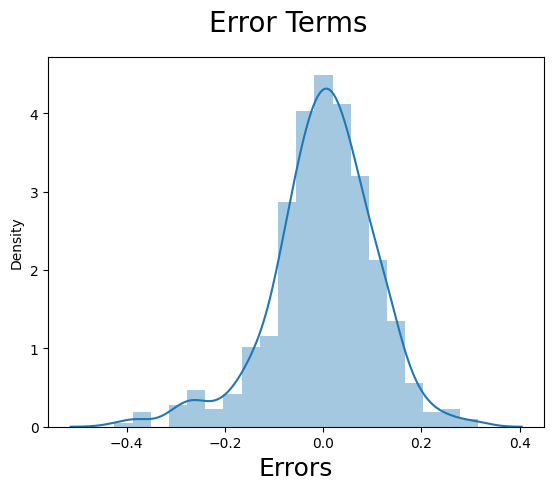

In [264]:
# Plotting the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

## Making Predictions

In [265]:
num_vars = ['cnt','temp','hum','windspeed','mnth','weekday','weathersit']

bikerental_test[num_vars] = scaler.fit_transform(bikerental_test[num_vars])
bikerental_test.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
184,0,0.545455,1,0.166667,0,0.5,0.837241,0.534223,0.150577,0.701863
535,1,0.454545,0,0.500000,1,0.0,0.911423,0.470417,0.232972,0.723159
299,0,0.818182,0,0.666667,1,0.5,0.496221,0.777843,0.446910,0.272912
221,0,0.636364,0,0.500000,1,0.0,0.890387,0.236659,0.453268,0.541767
152,0,0.454545,0,0.666667,1,0.0,0.821739,0.070765,0.687792,0.565598


In [266]:
y_test = bikerental_test.pop('cnt')
X_test = bikerental_test


### Apologies couldn't move further from here due to time constraints and submission deadline. Was hoping to delve a bit more into how these factors may also individually explain both registered and casual user count